# ASSIGNMENT-4 (CNN Model)

In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


# Image Augmentation

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
train_datagen=ImageDataGenerator(rescale=1/255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)

In [5]:
test_datagen=ImageDataGenerator(rescale=1/255)

In [6]:
x_train=train_datagen.flow_from_directory(r'E:\SmartBridge Externship\Assignment-4\CNN_Dataset\Training',target_size=(64,64),
                                         class_mode='categorical',batch_size=100)

Found 1238 images belonging to 4 classes.


In [7]:
len(x_train)

13

In [8]:
x_test=test_datagen.flow_from_directory(r'E:\SmartBridge Externship\Assignment-4\CNN_Dataset\Testing',target_size=(64,64),
                                         class_mode='categorical',batch_size=100)

Found 326 images belonging to 4 classes.


In [9]:
x_train.class_indices

{'bears': 0, 'crows': 1, 'elephants': 2, 'rats': 3}

# Import Libraries

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

# Create the model

In [11]:
model=Sequential()

# Add Layers

In [12]:
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3)))

In [13]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [14]:
model.add(Flatten())

In [15]:
#hidden layer-1
model.add(Dense(300,activation='relu'))
#hidden layer-2
model.add(Dense(150,activation='relu'))

In [16]:
#output layer
model.add(Dense(4,activation='softmax'))

# Compile the model

In [17]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# Fit the model

In [18]:
model.fit_generator(x_train,steps_per_epoch=len(x_train),epochs=10,validation_data=x_test,validation_steps=len(x_test))

C:\Users\Kapil\AppData\Local\Temp/ipykernel_13352/234118701.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(x_train,steps_per_epoch=len(x_train),epochs=10,validation_data=x_test,validation_steps=len(x_test))


Epoch 1/10
13/13 [==============================] - 21s 2s/step - loss: 3.5117 - accuracy: 0.3005 - val_loss: 1.5976 - val_accuracy: 0.2607
Epoch 2/10
13/13 [==============================] - 15s 1s/step - loss: 1.3834 - accuracy: 0.3207 - val_loss: 1.2972 - val_accuracy: 0.3865
Epoch 3/10
13/13 [==============================] - 18s 1s/step - loss: 1.2110 - accuracy: 0.4871 - val_loss: 1.1594 - val_accuracy: 0.4877
Epoch 4/10
13/13 [==============================] - 14s 1s/step - loss: 1.0014 - accuracy: 0.5945 - val_loss: 0.9375 - val_accuracy: 0.6012
Epoch 5/10
13/13 [==============================] - 16s 1s/step - loss: 0.8685 - accuracy: 0.6438 - val_loss: 0.6696 - val_accuracy: 0.7393
Epoch 6/10
13/13 [==============================] - 20s 2s/step - loss: 0.7242 - accuracy: 0.7189 - val_loss: 0.6242 - val_accuracy: 0.7945
Epoch 7/10
13/13 [==============================] - 13s 976ms/step - loss: 0.7002 - accuracy: 0.7286 - val_loss: 0.5431 - val_accuracy: 0.8037
Epoch 8/10
13/13 

# Save the model

In [19]:
model.save('animal.h5')

# Testing the CNN Model

In [29]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [32]:
model=load_model('animal.h5')
img=image.load_img(r'E:\SmartBridge Externship\Assignment-4\CNN_Dataset\Testing\elephants\namibia_1057544__340.jpg',target_size=(64,64))

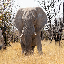

In [33]:
img

In [34]:
x=image.img_to_array(img)

In [35]:
x

array([[[161., 149., 133.],
        [250., 241., 242.],
        [249., 255., 255.],
        ...,
        [255., 253., 255.],
        [231., 243., 241.],
        [219., 215., 229.]],

       [[239., 222., 228.],
        [215., 214., 219.],
        [142., 129., 138.],
        ...,
        [242., 242., 250.],
        [229., 240., 242.],
        [233., 229., 244.]],

       [[173., 162., 156.],
        [243., 251., 253.],
        [248., 255., 255.],
        ...,
        [151., 148., 159.],
        [243., 255., 255.],
        [ 94.,  91., 100.]],

       ...,

       [[219., 177., 117.],
        [224., 189., 133.],
        [217., 178., 109.],
        ...,
        [245., 204., 138.],
        [230., 195., 141.],
        [234., 195., 130.]],

       [[211., 172., 115.],
        [229., 190., 131.],
        [235., 199., 141.],
        ...,
        [234., 179.,  97.],
        [230., 193., 140.],
        [242., 197., 129.]],

       [[233., 195., 120.],
        [235., 187., 125.],
        [220., 1

In [36]:
x.ndim

3

In [37]:
x=np.expand_dims(x,axis=0)

In [38]:
x

array([[[[161., 149., 133.],
         [250., 241., 242.],
         [249., 255., 255.],
         ...,
         [255., 253., 255.],
         [231., 243., 241.],
         [219., 215., 229.]],

        [[239., 222., 228.],
         [215., 214., 219.],
         [142., 129., 138.],
         ...,
         [242., 242., 250.],
         [229., 240., 242.],
         [233., 229., 244.]],

        [[173., 162., 156.],
         [243., 251., 253.],
         [248., 255., 255.],
         ...,
         [151., 148., 159.],
         [243., 255., 255.],
         [ 94.,  91., 100.]],

        ...,

        [[219., 177., 117.],
         [224., 189., 133.],
         [217., 178., 109.],
         ...,
         [245., 204., 138.],
         [230., 195., 141.],
         [234., 195., 130.]],

        [[211., 172., 115.],
         [229., 190., 131.],
         [235., 199., 141.],
         ...,
         [234., 179.,  97.],
         [230., 193., 140.],
         [242., 197., 129.]],

        [[233., 195., 120.],
       

In [39]:
x.ndim

4

In [41]:
pred=np.argmax(model.predict(x),axis=1)

1/1 [==============================] - 1s 580ms/step


In [42]:
pred

array([2], dtype=int64)

In [43]:
index=['bears','crows','elephants','rats']
print(index[pred[0]])

elephants


# Open-CV


In [44]:
pip install opencv-python

In [45]:
import cv2

In [46]:
img=cv2.imread(r'E:\SmartBridge Externship\Assignment-4\CNN_Dataset\Testing\elephants\namibia_1057544__340.jpg',1)

In [47]:
img

array([[[248, 233, 237],
        [230, 213, 217],
        [167, 148, 151],
        ...,
        [255, 245, 253],
        [253, 242, 250],
        [253, 246, 251]],

       [[249, 236, 238],
        [244, 231, 233],
        [200, 186, 190],
        ...,
        [255, 251, 255],
        [255, 244, 252],
        [247, 240, 245]],

       [[246, 241, 238],
        [229, 225, 224],
        [216, 220, 221],
        ...,
        [250, 237, 245],
        [255, 251, 255],
        [210, 203, 208]],

       ...,

       [[130, 181, 224],
        [125, 183, 225],
        [116, 185, 224],
        ...,
        [113, 192, 231],
        [135, 196, 236],
        [157, 209, 249]],

       [[139, 190, 233],
        [130, 188, 230],
        [113, 182, 221],
        ...,
        [116, 195, 234],
        [133, 194, 234],
        [146, 198, 238]],

       [[148, 199, 242],
        [135, 193, 235],
        [107, 176, 215],
        ...,
        [120, 199, 238],
        [135, 196, 236],
        [142, 194, 234]]

In [48]:
img1=cv2.imread(r'E:\SmartBridge Externship\Assignment-4\CNN_Dataset\Testing\elephants\namibia_1057544__340.jpg',0)

In [49]:
img1

array([[236, 216, 151, ..., 249, 246, 248],
       [238, 233, 189, ..., 255, 248, 242],
       [241, 225, 220, ..., 241, 255, 205],
       ...,
       [188, 189, 189, ..., 195, 201, 215],
       [197, 194, 186, ..., 198, 199, 204],
       [206, 199, 180, ..., 202, 201, 200]], dtype=uint8)

In [50]:
print(img.shape)

(340, 448, 3)


In [52]:
img=cv2.imread(r'E:\SmartBridge Externship\Assignment-4\CNN_Dataset\Testing\elephants\namibia_1057544__340.jpg',1)
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# CNN Video Analysis

In [1]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model=load_model('animal.h5')
video=cv2.VideoCapture(0)
index=['bears','crows','elephants','rats']
while 1:
    succes,frame=video.read() 
    cv2.imwrite('image.jpg',frame)
    img=image.load_img('image.jpg',target_size=(64,64))
    x=image.img_to_array(img)
    x=np.expand_dims(x,axis=0)
    pred=model.predict_classes(x)
    y=pred[0]
    cv2.putText(frame,'The Predicted Animal is: '+str(index[y]),(100,100),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,0),4)
    cv2.imshow('image',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
video.release()
cv2.destroyAllWindows()

AttributeError: 'Sequential' object has no attribute 'predict_classes'